In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_path = '4-train_66_withTime.csv'
test_path = '4-test_66_withTime.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Define features and target
features = [
    col for col in train_data.columns if col not in ["time", "power"] ]

X = train_data[features]
y = train_data["power"]

               lgws          mgws       azimuth      altitude          trpp  \
count  14592.000000  14592.000000  14592.000000  14592.000000  14592.000000   
mean       3.229474      5.521413    180.373771     -0.681957  10199.328199   
std      481.957106    345.190478     97.193872     42.225164   1272.833587   
min    -2015.564403  -2021.000092      0.015230    -86.015315   7110.409180   
25%     -338.791865   -218.006386     91.498073    -37.261300   9333.484287   
50%       -0.140740      1.654481    179.962377      0.096351  10112.652714   
75%      339.090821    228.770337    268.938849     35.922406  10921.297618   
max     2111.751637   2076.127798    359.849807     84.922569  15505.186516   

               flsr          mudlp           blh         deg0l         viwvn  \
count  14592.000000   14592.000000  14592.000000  14592.000000  14592.000000   
mean     -10.483178   95211.896224    473.304515   4875.284705    145.345436   
std        0.554136    7305.685629    176.685428

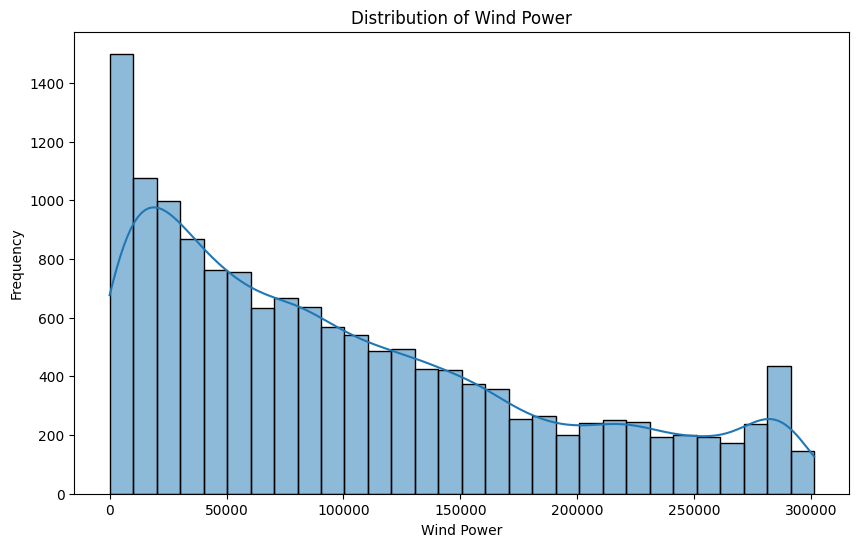

In [2]:
# Basic statistics of the dataset
print(train_data[features + ["power"]].describe())

correlation_matrix = train_data[features + ["power"]].corr()
print(correlation_matrix)

# Plot distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Wind Power")
plt.xlabel("Wind Power")
plt.ylabel("Frequency")
plt.show()

In [3]:
def plot_features(data, features, start_index):
    end_index = start_index + 9
    selected_features = features[start_index:end_index]

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
    fig.suptitle("Feature Visualizations")

    for idx, feature in enumerate(selected_features):
        print(f"Plotting {feature}...")
        ax = axes[idx // 3, idx % 3]
        x = np.arange(1, len(data) + 1)
        y = data[feature]
        sns.lineplot(x=x, y=y, ax=ax)
        ax.set_title(f"{feature}")
        ax.set_xlabel("Index")
        ax.set_ylabel("Value")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Plotting altitude...
Plotting trpp...
Plotting flsr...
Plotting mudlp...
Plotting blh...
Plotting deg0l...
Plotting viwvn...
Plotting ws200...
Plotting u200...


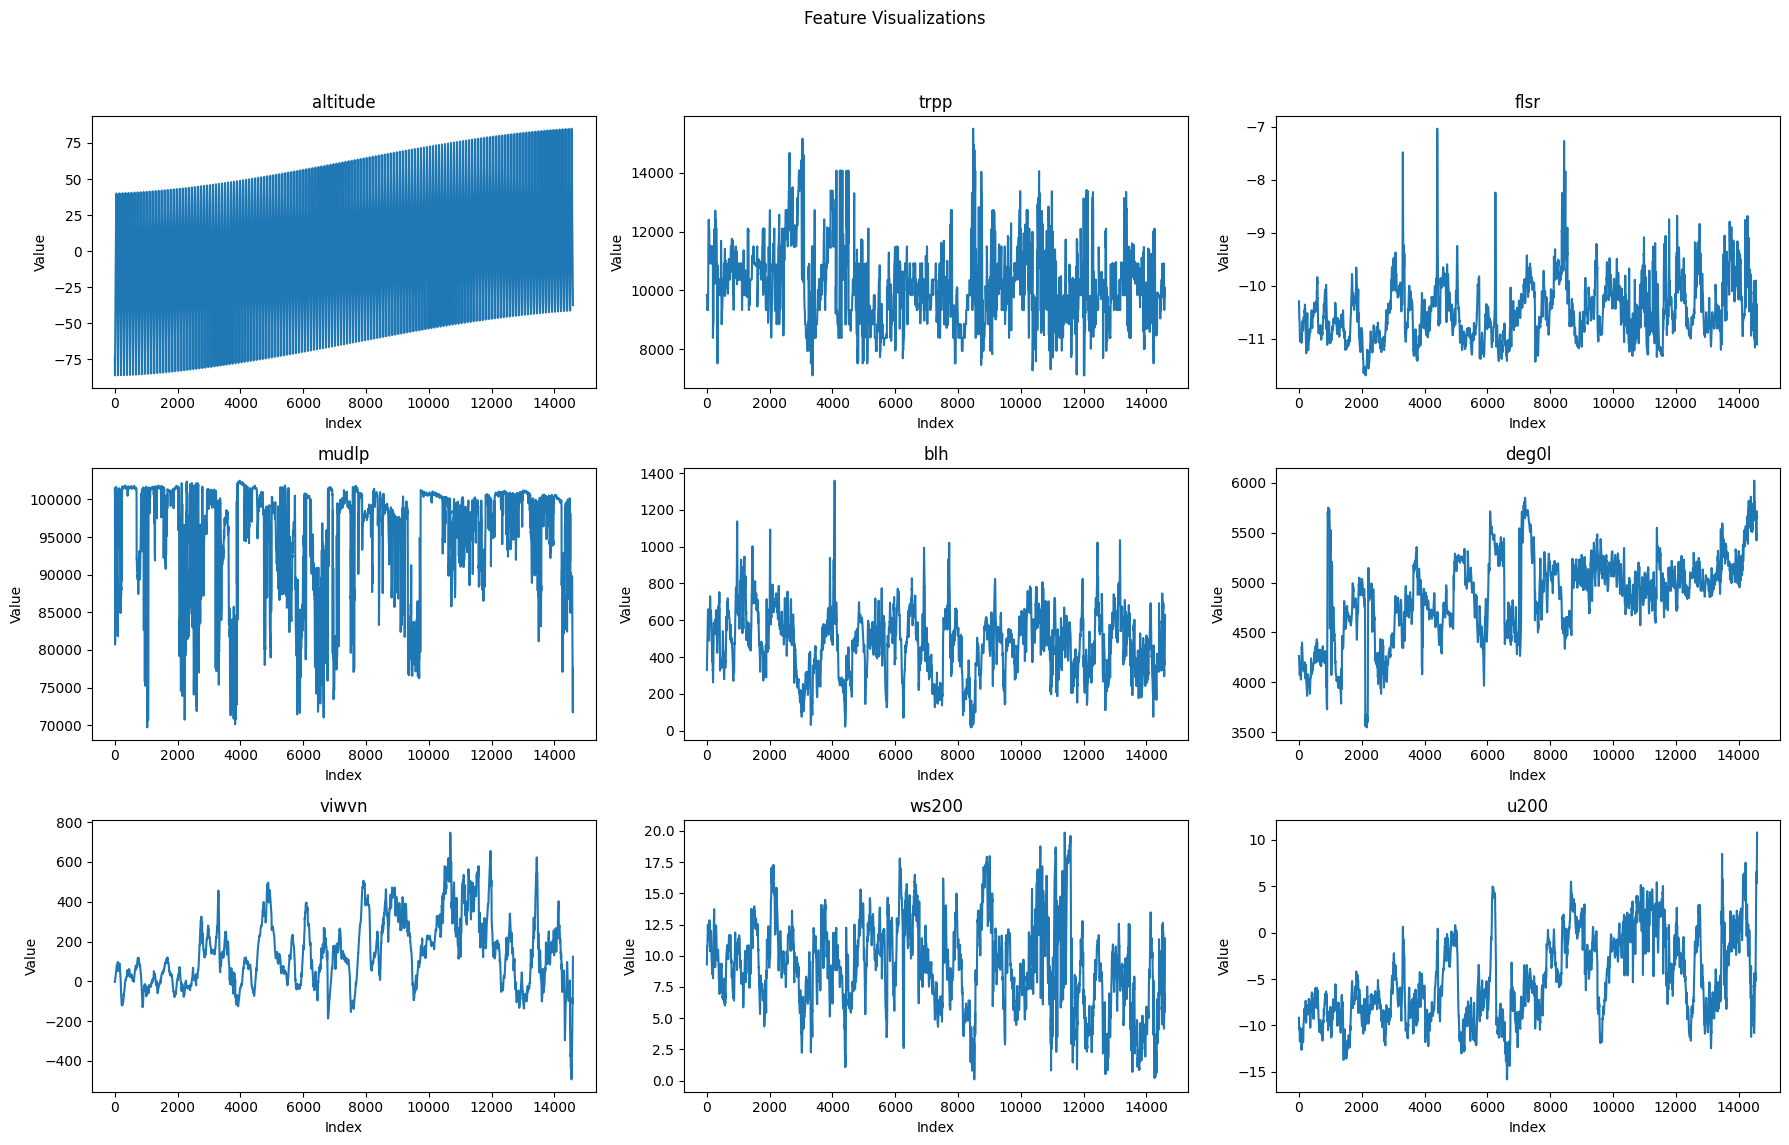

In [4]:
# Define start index
start_index = 3

# Call the function to plot features
plot_features(train_data[features + ["power"]], features + ["power"], start_index)

In [5]:
# Calculate the correlation matrix
corr_matrix = X.corr().abs()

# Set the threshold for correlation
threshold = 0.8

# Identify groups of features with high correlation
groups = {}
for i in range(len(corr_matrix.columns)):
    feature = corr_matrix.columns[i]
    if feature not in groups:
        groups[feature] = set()
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            correlated_feature = corr_matrix.columns[j]
            print(f"{feature} and {correlated_feature} are highly correlated with value {corr_matrix.iloc[i, j]}")
            if correlated_feature in groups:
                groups[correlated_feature].add(feature)
                groups[feature] = groups[correlated_feature]
            else:
                groups[feature].add(correlated_feature)
                groups[correlated_feature] = groups[feature]

# Ensure each independent feature is its own group
for feature in corr_matrix.columns:
    if all([feature not in group for group in groups.values()]):
        groups[feature] = {feature}

# Print the groups
for group in groups.values():
    print(group)
    

ws200 and flsr are highly correlated with value 0.8580553069521316
v10n and viwvn are highly correlated with value 0.8013866452170453
cape and capes are highly correlated with value 0.8066370774486115
viwve and u200 are highly correlated with value 0.8190631926865107
uoe and von are highly correlated with value 0.9380522751296393
tisr and altitude are highly correlated with value 0.8885927339870855
nsss and ewss are highly correlated with value 0.8518484755894764
mlcape100 and capes are highly correlated with value 0.8260147021003302
mlcape100 and cape are highly correlated with value 0.943287352140974
fdir and dsrp are highly correlated with value 0.9601218375358865
slhf and sshf are highly correlated with value 0.8925721373586514
tcwv and kx are highly correlated with value 0.8348651964889667
tcwv and hwbt1 are highly correlated with value 0.9110088320680273
mlcape50 and capes are highly correlated with value 0.8343811993804207
mlcape50 and cape are highly correlated with value 0.948

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data_dir = "/data/Pein/Pytorch/Wind-Power-Prediction/data/"
file_name_common = 'farm_99_withTime'
train_data = pd.read_csv(data_dir + f"train_{file_name_common}.csv")
test_data = pd.read_csv(data_dir + f"test_{file_name_common}.csv")

# Define features and target
features = [
    col for col in train_data.columns if col not in ["time", "lead_hour", "power"]
]
X = train_data[features]
y = train_data["power"]

FileNotFoundError: [Errno 2] No such file or directory: '/data/Pein/Pytorch/Wind-Power-Prediction/data/train_farm_99_withTime.csv'

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIF for each feature
X_with_constant = sm.add_constant(X)  # Add a constant to the model for VIF calculation
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i + 1) for i in range(len(X.columns))]

In [ ]:
# sort VIF values in descending order
vif_data.sort_values(by="VIF", ascending=False, inplace=True)
print(vif_data)

   Feature            VIF
82    lblt  882084.458605
83    stl1  841059.055134
75     ssr  784625.343619
59    ssrd  749831.330101
78   ssrdc  404481.338844
..     ...            ...
28  litoti       1.596613
3     trpp       1.284804
1     lgws       1.036545
0     mgws       1.032609
12     gwd       1.008989

[96 rows x 2 columns]


In [ ]:
# Display features with high VIF
print("VIF values for each feature:")
print(vif_data)

# Optional: Filter out features with VIF above a threshold, e.g., 10
vif_threshold = 10
filtered_features = vif_data[vif_data["VIF"] < vif_threshold]["Feature"].tolist()

print(f"Features selected with VIF < {vif_threshold}: {filtered_features}")

VIF values for each feature:
             Feature        VIF
0               mgws   1.032609
1               lgws   1.036545
2           altitude  92.669475
3               trpp   1.284804
4            azimuth   3.464640
..               ...        ...
91  quarter_hour_cos   3.002502
92           day_sin   4.600068
93           day_cos   2.150873
94   day_in_week_sin   3.255278
95   day_in_week_cos   1.767267

[96 rows x 2 columns]
Features selected with VIF < 10: ['mgws', 'lgws', 'trpp', 'azimuth', 'deg0l', 'mudlp', 'blh', 'degm10l', 'mcc', 'gwd', 'p3020', 'lcc', 'mld', 'sund', 'vimd', 'capes', 'bld', 'lspf', 'viwve', 'litoti', 'ilspf', 'hcc', 'ttr', 'hour', 'quarter_hour', 'day', 'day_in_week', 'hour_sin', 'quarter_hour_sin', 'quarter_hour_cos', 'day_sin', 'day_cos', 'day_in_week_sin', 'day_in_week_cos']
